In [13]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
# from langdetect import detect_langs #detect lang
# from langdetect import detect #detect lang

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.1.5
Matplotlib version 3.3.3


In [14]:
import glob

path = '2021'
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, engine = 'python', index_col=None, header=0, encoding='utf-16')
    li.append(df)
# print(li)
    
raw_data = pd.concat(li, axis=0, ignore_index=True)
raw_data.info()

['2021\\reviews_reviews_com.quipper.school.assignment_202101.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202102.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202103.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202104.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202105.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202106.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202107.csv', '2021\\reviews_reviews_com.quipper.school.assignment_202108.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           3490 non-null   object 
 1   App Version Code                       2861 non-null   float64
 2   App Version Name                       2861 non-null   object 
 3   Reviewer Language  

<AxesSubplot:ylabel='Star Rating'>

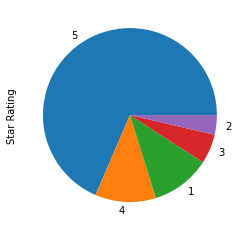

In [15]:
raw_data['Star Rating'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Reviewer Language'>

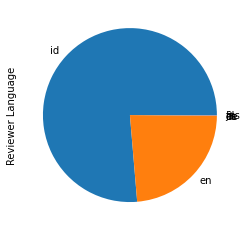

In [16]:
raw_data['Reviewer Language'].value_counts().plot(kind='pie')

In [17]:
is_bad_rating = raw_data['Star Rating'] <= 4
is_review_available = pd.notnull(raw_data['Review Text'])
is_no_review = pd.isnull(raw_data['Review Text'])

id_bad_ratting = raw_data['Reviewer Language'] == "id"
en_bad_ratting = raw_data['Reviewer Language'] == "en"

bad_ratting_no_review = raw_data[is_bad_rating & is_no_review]
bad_ratting_with_review = raw_data[is_bad_rating & is_review_available]

id_bad_ratting_no_review = raw_data[is_bad_rating & is_no_review & id_bad_ratting]
id_bad_ratting_with_review = raw_data[is_bad_rating & is_review_available & id_bad_ratting]

en_bad_ratting_no_review = raw_data[is_bad_rating & is_no_review & en_bad_ratting]
en_bad_ratting_with_review = raw_data[is_bad_rating & is_review_available & en_bad_ratting]

print("with review: ", len(bad_ratting_with_review), " vs no review: ", len(bad_ratting_no_review))
print("id with review: ", len(id_bad_ratting_with_review), " vs no review: ", len(id_bad_ratting_no_review))
print("en with review: ", len(en_bad_ratting_with_review), " vs no review: ", len(en_bad_ratting_no_review))

with review:  513  vs no review:  585
id with review:  392  vs no review:  421
en with review:  120  vs no review:  164


<AxesSubplot:ylabel='Review Text'>

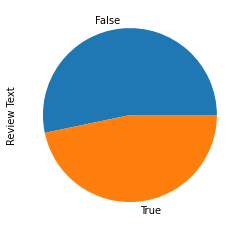

In [18]:
bad_rating = raw_data[is_bad_rating] 
write_ratting = pd.notnull(bad_rating['Review Text'])
write_ratting.value_counts().plot(kind='pie')

In [19]:
print("indonesia:")
id_bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']].tail(30)

indonesia:


,Star Rating,Review Text,App Version Name
3363,2,"Ni knpa pas sy lg ngerjain soal keluar² mulu, ...",6.1.5
3368,1,"Kenapa kalau masuk,keluar lagi hufftttt😑",6.1.5
3370,1,Bug berhenti terus aplikasi nya. Tolong di per...,6.1.5
3371,4,Keluar sendiri,NaN
3372,1,Tolong ya admin sya mau belajar dan mengerjaka...,6.1.5
3381,3,Apk nya bagus banget,NaN
3383,2,"Keluar keluar sendiri dari aplikasi, ga jelas ...",6.1.5
3392,1,Kok jadi keluar² semenjak udah update sebelum ...,6.1.5
3393,1,Force close,6.1.5
3394,1,"Kenapa setelah di update jadi ke gini ,suka ke...",6.1.5


In [20]:
print ("english:")
en_bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']].tail(30)

english:


,Star Rating,Review Text,App Version Name
2980,2,tempat materi sama tugasnya kok digabung ya? s...,NaN
2982,3,Hello im just a grade 6 student asking for a s...,6.1.3
2985,1,Why I can't login to my account properly that ...,6.1.3
3006,3,This app make my class/study easier..,NaN
3067,4,how do I leave a class? I encoded some wrong c...,6.1.3
3103,1,I am from the philippines and its all indonesian,6.1.3
3181,1,I read every comments in this app but when I t...,NaN
3202,1,Hakdog,6.1.0
3208,2,I cant open those codes,NaN
3233,4,"Best school platform, easy to use.",NaN


In [21]:
def check_review_text(text):
    if (isinstance(text, pd.Series)):
        return ' '.join(text)
    else:
         return text   

In [22]:
review_text =  bad_ratting_with_review['Review Text'] 
# print(check_review_text(review_text[163]))
# for review in review_text:
#     text = check_review_text(review)
#     print(text)
list_text = map(check_review_text, review_text)
print(len(list(list_text)), len(review_text))

513 513
